In [5]:
!pip install simpleaudio

In [6]:
pip install --upgrade simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [7]:
from scipy.io import wavfile
import scipy.io.wavfile as wav
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
from scipy import signal as sig

# Assignment 1

In [8]:
# Assignment1
# Part A
# Load the WAV file
file_path = 'train32.wav'
fs1, x1 = wavfile.read(file_path)

# Print the sampling rate and the shape of x1
fs1, x1.shape

(32000, (50313,))

In [9]:
# Assignment1
# Part B
# Calculate the new sampling rates
fs2 = int(fs1 / 2)  # 16 kHz
fs3 = int(1.5 * fs1)  # 48 kHz

# Write the new audio files
wavfile.write('train16.wav', fs2, x1.astype(np.int16))
wavfile.write('train48.wav', fs3, x1.astype(np.int16))

In [10]:
# Assignment1
# Part C
# Function to play a WAV file
def play_wav(file_path):
    fs, data = wavfile.read(file_path)
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

# Paths to the WAV files
original_file = 'train32.wav'
file_16kHz = 'train16.wav'   
file_48kHz = 'train48.wav'     

# Play each file
print("Playing original file (32 kHz)...")
play_wav(original_file)

print("Playing 16 kHz version...")
play_wav(file_16kHz)

print("Playing 48 kHz version...")
play_wav(file_48kHz)

Playing original file (32 kHz)...
Playing 16 kHz version...
Playing 48 kHz version...


## Discussion
- A file with a halved sample rate (16 kHz) is likely to sound slower and lower in pitch
- A file with 1.5 times greater rate (48 kHz) may sound faster and higher in pitch.

# Assignment 2

In [11]:
# Assignment 2
# Part A
# Re-load the original WAV file as the code execution state was reset
file_path = 'train32.wav'
fs1, x1 = wavfile.read(file_path)

# Length of x1
len1 = len(x1)

# Find the index corresponding to t = 0.5 seconds
n0 = int(0.5 * fs1)  # Since fs1 is the sampling frequency

# Create the discrete time signal s1
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len1 - n0)))

# Multiply x1 with s1 to create v1
v1 = x1 * s1

# Save this signal to a wav file
output_file_path = 'train_v1.wav'
wavfile.write(output_file_path, fs1, v1.astype(np.int16))

output_file_path


'train_v1.wav'

In [12]:
# Assignment 2
# Part B
# Create the discrete-time decaying ramp signal r1
# It starts at 1 and linearly decays to 0
r1 = np.linspace(1, 0, len1)

# Multiply x1 with r1 to create v2
v2 = x1 * r1

# Save this signal to a wav file
output_file_path_v2 = 'train_v2.wav'
wavfile.write(output_file_path_v2, fs1, v2.astype(np.int16))

output_file_path_v2


'train_v2.wav'

In [13]:
# Assignment 2
# Part C
def play_wav(file_path):
    fs, data = wavfile.read(file_path)
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

# Paths to the WAV files
original_file = 'train32.wav' 
v1_file = 'train_v1.wav'
v2_file = 'train_v2.wav'

# Play each file in sequence
print("Playing original file (32 kHz)...")
play_wav(original_file)

print("Playing v1 (modified with s1)...")
play_wav(v1_file)

print("Playing v2 (modified with r1)...")
play_wav(v2_file)


Playing original file (32 kHz)...
Playing v1 (modified with s1)...
Playing v2 (modified with r1)...


## Discussion
- The v1 signal should have the original volume for the first half-second and then a lowered volume for the remainder of the time. The v2 signal have a volume that gradually declines from its initial level to quiet.
- Setting s1 to 2 for the 0,0.5 range would amplify the signal during that time period, perhaps creating distortion if the loudness exceeded the audio format's maximum limit.
- For a Smooth but Faster Decay: An alternative signal, such as an exponential decay (for example, np.exp(-t) where t is a time vector), could be used to achieve a smoother and potentially faster amplitude decay. The rate of decay can be altered by adjusting the coefficient in the exponent.

# Assignment 3

In [14]:
# Assignment 3
# Part A
import decimal

def timescale(x, fs, a):
    n, d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x, d, n)
    t = np.arange(0, len(y), 1) * (1 / fs)
    return y, t

In [15]:
# Assignment 3
# Part B
def timescale(x, fs, a, target_dtype=None):
    x = np.array(x, dtype=np.float64)
    n, d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x, d, n)

    if target_dtype is not None:
        if target_dtype == np.int16:
            y = np.int16(y * 32767)
        else:
            y = y.astype(target_dtype)

    t = np.arange(0, len(y), 1) * (1 / fs)
    return y, t

# Load the provided wav file
fs, x1 = wav.read('train32.wav')

# B. Use the timescale function to obtain w(t) and v(t)

# a. Create w(t) using a=2
w, t_w = timescale(x1, fs, 2)

# b. Create v(t) using a=0.5
v, t_v = timescale(x1, fs, 0.5)

# c. Create a time-reversed version of the signal z(t)
z = np.ascontiguousarray(x1[::-1])
t_z = np.arange(0, len(z), 1) * (1 / fs)

# d. Save all the resulting signals to a wav file
wav.write('w_signal.wav', fs, w.astype(np.int16))
wav.write('v_signal.wav', fs, v.astype(np.int16))
wav.write('z_signal.wav', fs, z.astype(np.int16))

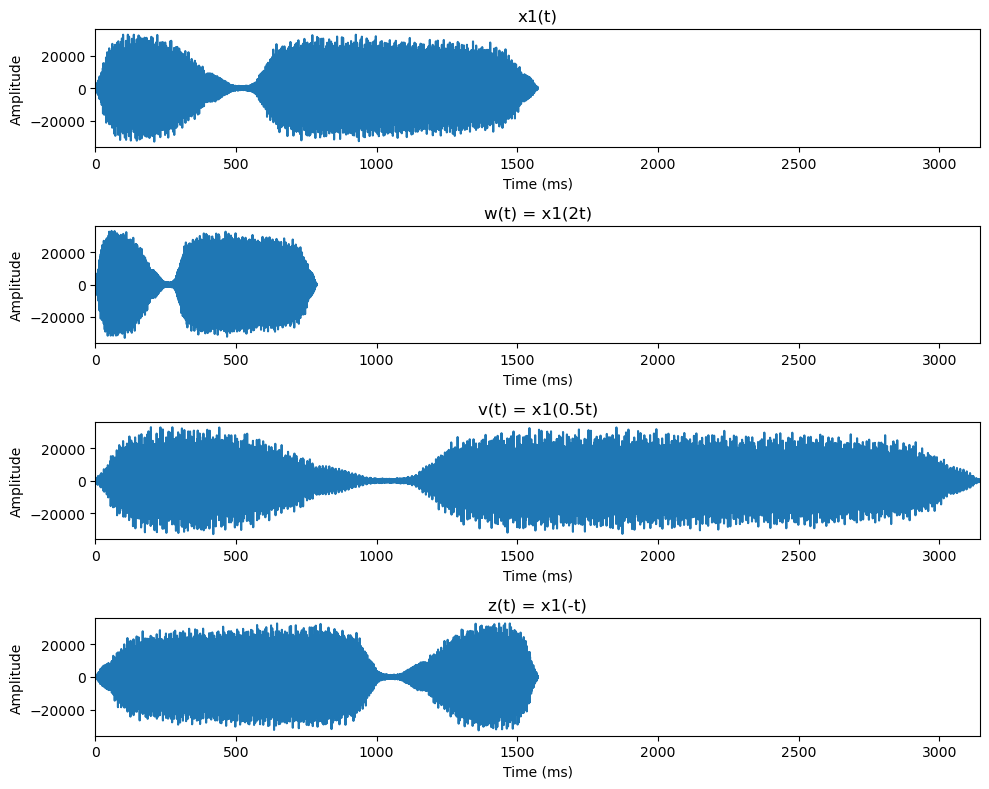

In [16]:
# Assignment 3
# Part C

# Convert time to milliseconds
t_x1_ms = np.arange(0, len(x1), 1) * (1000 / fs)
t_w_ms = t_w * 1000
t_v_ms = t_v * 1000
t_z_ms = t_z * 1000

x_limits = [0.0, 4000.0]
y_limits = [-25000, 25000]

            
# Adjusting the x-axis to have the same range for all subplots
max_time_ms = max(t_x1_ms[-1], t_w_ms[-1], t_v_ms[-1], t_z_ms[-1])

# Plotting with adjusted x-axis
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

# x1 plot
axs[0].plot(t_x1_ms, x1)
axs[0].set_title('x1(t)')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, max_time_ms)

# w plot
axs[1].plot(t_w_ms, w)
axs[1].set_title('w(t) = x1(2t)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, max_time_ms)

# v plot
axs[2].plot(t_v_ms, v)
axs[2].set_title('v(t) = x1(0.5t)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlim(0, max_time_ms)

# z plot
axs[3].plot(t_z_ms, z)
axs[3].set_title('z(t) = x1(-t)')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')
axs[3].set_xlim(0, max_time_ms)

# Adjust spacing
plt.tight_layout()
plt.show()

In [17]:
# Assignment 3
# Part D
# 将numpy数组转换为适合播放的格式
def numpy_to_waveobj(signal, fs, num_channels=1, sample_width=2):
    # Ensure the signal is of an integer type suitable for the WAV format
    signal = np.int16(signal / np.max(np.abs(signal)) * 32767)
    # Convert to byte data
    signal_bytes = signal.tobytes()
    # Create a WaveObject instance for playback
    return sa.WaveObject(signal_bytes, num_channels, sample_width, fs)

# Create WaveObject instances
x1_wave = numpy_to_waveobj(x1, fs1)
w_wave = numpy_to_waveobj(w, fs1)
v_wave = numpy_to_waveobj(v, fs1)
z_wave = numpy_to_waveobj(z, fs1)

# Play
print("Playing original file (x1)...")
play_obj = x1_wave.play()
play_obj.wait_done()

print("Playing w (time scaled by a=2)...")
play_obj = w_wave.play()
play_obj.wait_done()

print("Playing v (time scaled by a=0.5)...")
play_obj = v_wave.play()
play_obj.wait_done()

print("Playing z (time reversed)...")
play_obj = z_wave.play()
play_obj.wait_done()


Playing original file (x1)...
Playing w (time scaled by a=2)...
Playing v (time scaled by a=0.5)...
Playing z (time reversed)...


## Discussion
- Rather of containing all of the subplots within a single figure window, each call to subplot following a figure command would result in a separate figure window. This would result in four different figure windows, each containing one of the plots (for signals x1, w, v, and z).

- In the original script, all subplots are included in a single figure, so zooming and moving (panning) would affect all subplots at once. With separate figures, each plot may be explored and scaled independently.

- Each subplot (for the signals x1, w, v, and z) will be displayed in its own separate figure window instead of being part of a single, unified figure. This separation leads to a few specific changes such as Independent Figures and layout differences.

# Assignment 4

In [18]:
# Assignment 4
# Part A
def timeshift(x, fs, t0):
    """
    Shifts the signal x by t0 seconds.

    Parameters:
    x (numpy array): The input signal.
    fs (int): The sampling frequency in Hz.
    t0 (float): The time shift in seconds.

    Returns:
    tuple: Tuple containing:
        - numpy array: The shifted signal.
        - numpy array: The time vector corresponding to the shifted signal.
    """

    # Convert time shift t0 to integer shift n0
    n0 = int(fs * t0)

    if t0 > 0:
        # Time delay: Concatenate a zero vector with the original signal
        y = np.concatenate((np.zeros(n0), x))
    else:
        # Time advance: Copy portion of the signal starting from |n0| 
        # and append |n0| zeroes at the end
        y = np.concatenate((x[-n0:], np.zeros(-n0)))

    # Create time vector for the new signal
    t = np.arange(0, len(y)) / fs

    return y, t


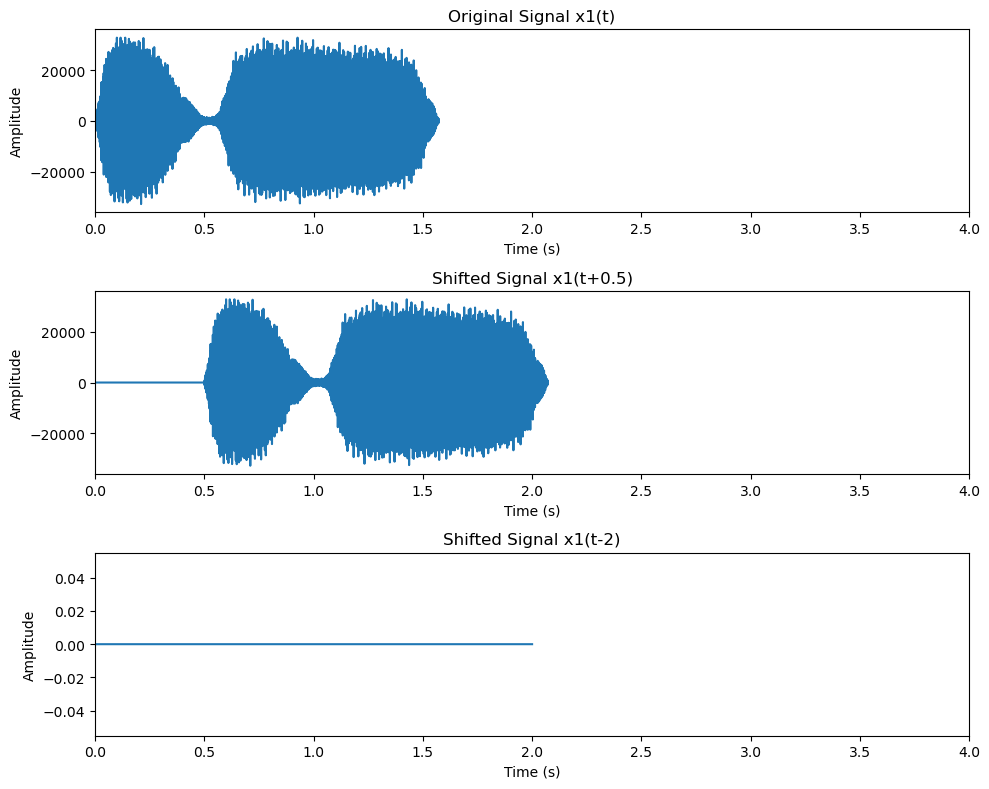

In [19]:
# Assignment 4
# Part B

# Generate shifted signals
x1_shifted_pos, t_shifted_pos = timeshift(x1, fs1, 0.5)
x1_shifted_neg, t_shifted_neg = timeshift(x1, fs1, -2)

# Create a 3x1 plot
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot original signal x1(t)
axs[0].plot(np.arange(len(x1)) / fs1, x1)
axs[0].set_xlim([0, 4])
axs[0].set_title('Original Signal x1(t)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Plot shifted signal x1(t+0.5)
axs[1].plot(t_shifted_pos, x1_shifted_pos)
axs[1].set_xlim([0, 4])
axs[1].set_title('Shifted Signal x1(t+0.5)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

# Plot shifted signal x1(t-2)
axs[2].plot(t_shifted_neg, x1_shifted_neg)
axs[2].set_xlim([0, 4])
axs[2].set_title('Shifted Signal x1(t-2)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')

# Adjust the layout
plt.tight_layout()
plt.show()


In [20]:
# Assignment 4
# Part C
def numpy_to_waveobj(signal, fs, num_channels=1, sample_width=2):
    # Normalize the signal and convert to 16-bit PCM format for playback
    signal_normalized = np.int16(signal / np.max(np.abs(signal)) * 32767)
    return sa.WaveObject(signal_normalized.tobytes(), num_channels, sample_width, fs)

# Convert the signals to WaveObjects
x1_wave = numpy_to_waveobj(x1, fs1)
x1_shifted_pos_wave = numpy_to_waveobj(x1_shifted_pos, fs1)
x1_shifted_neg_wave = numpy_to_waveobj(x1_shifted_neg, fs1)

# Play original signal x1(t)
print("Playing original signal x1(t)...")
play_obj = x1_wave.play()
play_obj.wait_done()

# Play shifted signal x1(t+0.5)
print("Playing shifted signal x1(t+0.5)...")
play_obj = x1_shifted_pos_wave.play()
play_obj.wait_done()

# Play shifted signal x1(t-2)
print("Playing shifted signal x1(t-2)...")
play_obj = x1_shifted_neg_wave.play()
play_obj.wait_done()


/var/folders/0p/tc6ypy7s5n15zd41kqmnz7x40000gn/T/ipykernel_36839/2411013438.py:5: RuntimeWarning: invalid value encountered in divide
  signal_normalized = np.int16(signal / np.max(np.abs(signal)) * 32767)
/var/folders/0p/tc6ypy7s5n15zd41kqmnz7x40000gn/T/ipykernel_36839/2411013438.py:5: RuntimeWarning: invalid value encountered in cast
  signal_normalized = np.int16(signal / np.max(np.abs(signal)) * 32767)


Playing original signal x1(t)...
Playing shifted signal x1(t+0.5)...
Playing shifted signal x1(t-2)...


## Discussion
-Yes, it correctly handles these cases. However, if there is a significant movement forward in time, it can consume a large amount of computer memory because it generates a long signal with many zeros. A more memory-efficient approach for significant advancements could be to return a shorter signal that does not include the zeros.

# Bonus

In [9]:
import numpy as np
from scipy.io import wavfile
import simpleaudio as sa

In [13]:
# Load the flute.wav file
flute_file_path = 'music.wav'
fs_flute, flute_data = wavfile.read(flute_file_path)

# Function definitions for signal modifications

def add_silence(signal, length, fs, at_start=True):
    silence = np.zeros(int(length * fs))
    return np.concatenate((silence, signal)) if at_start else np.concatenate((signal, silence))

def time_shift(signal, shift_sec, fs):
    shift_samples = int(shift_sec * fs)
    if shift_samples > 0:
        return np.concatenate((np.zeros(shift_samples), signal[:-shift_samples]))
    else:
        return np.concatenate((signal[-shift_samples:], np.zeros(-shift_samples)))

def time_scale(signal, scale_factor):
    return signal[::int(scale_factor)]

def clip_signal(signal, max_length_sec, fs, max_amplitude=32767):
    max_samples = int(max_length_sec * fs)
    if len(signal) > max_samples:
        signal = signal[:max_samples]
    signal = np.clip(signal, -max_amplitude, max_amplitude)
    return signal

# Applying signal modifications

# Time Scaling (speed up by 2x)
scaled_signal = time_scale(flute_data, 2)

# Time Shifting (shift by 2 seconds)
shifted_signal = time_shift(flute_data, 2, fs_flute)

# Multiplication (double the amplitude)
multiplied_signal = flute_data * 2

# Addition (combine original and time-shifted signal)
added_signal = flute_data[:len(shifted_signal)] + shifted_signal

# Concatenating the signals with brief silences
final_signal = np.concatenate([
    add_silence(scaled_signal, 1, fs_flute),  # 1 second of silence before
    add_silence(multiplied_signal, 1, fs_flute, at_start=False),  # 1 second of silence after
    added_signal
])

# Clipping the final signal
final_signal = clip_signal(final_signal, 20, fs_flute)

# Saving the final signal as a WAV file
final_file_path = 'final_flute_signal.wav'
wavfile.write(final_file_path, fs_flute, final_signal.astype(np.int16))

# Function to play a WAV file
def play_wav(file_path):
    fs, data = wavfile.read(file_path)
    play_obj = sa.play_buffer(data, 1, data.dtype.itemsize, fs)
    play_obj.wait_done()

# Paths to the WAV files
bonus_file = 'music.wav'
modify_bonus = 'final_flute_signal.wav'   
 

# Playing the original flute signal
print("Playing original file (32 kHz)...")
play_wav(bonus_file)

# Play the final modified flute signal
print("Playing the final modified flute signal...")
play_wav(modify_bonus)


Playing original file (32 kHz)...
Playing the final modified flute signal...
